In [1]:
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## defining a frame for image and mask storage
framObjTrain = {'img' : [],
           'mask' : []
          }

framObjValidation = {'img' : [],
           'mask' : []
          }

## defining data Loader function
def LoadData( frameObj = None, imgPath = None, maskPath = None, shape = 256):
    imgNames = os.listdir(imgPath)
    maskNames = []
    
    ## generating mask names
    for mem in imgNames:
        maskNames.append(re.sub('\.jpg', '.png', mem))
    
    imgAddr = imgPath + '/'
    maskAddr = maskPath + '/'
    
    for i in range (len(imgNames)):
        try:
            img = plt.imread(imgAddr + imgNames[i])
            mask = plt.imread(maskAddr + maskNames[i])
            img = cv2.resize(img, (shape, shape))
            mask = cv2.resize(mask, (shape, shape))
        except:
            continue
    
        frameObj['img'].append(img)
        frameObj['mask'].append(mask) 
    return frameObj

In [2]:
framObjTrain = LoadData( framObjTrain,
                        imgPath = 'dataset/images', 
                        maskPath = 'dataset/labels/pixel_level_labels_colored',
                        shape = 256)

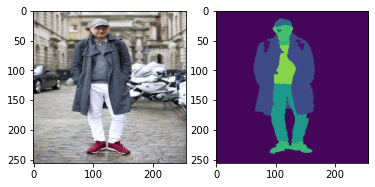

In [3]:
## displaying data loaded by our function
import random
n = random.randint(0,100)
n = 3
plt.subplot(1,2,1)
plt.imshow(framObjTrain['img'][n])
plt.subplot(1,2,2)
plt.imshow(framObjTrain['mask'][n])
plt.show()

In [40]:
model = tf.keras.models.load_model('save_model/model.h5')

In [37]:
def predict16 (valMap, model, shape = 256):
    ## getting and proccessing val data
    img = valMap['img']
    mask = valMap['mask']
    mask = mask[0:100]
    
    imgProc = img [0:100]
    imgProc = np.array(img)
    
    predictions = model.predict(imgProc)
    for i in range(len(predictions)):
        predictions[i] = cv2.merge((predictions[i,:,:,0],predictions[i,:,:,1],predictions[i,:,:,2]))
    
    return predictions, imgProc, mask


def Plotter(img, predMask, groundTruth):
    plt.figure(figsize=(7,7))
    
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title('image')
    
    plt.subplot(1,3,2)
    plt.imshow(predMask)
    plt.title('Predicted Mask')
    
    plt.subplot(1,3,3)
    plt.imshow(groundTruth)
    plt.title('actual Mask')

In [41]:
maskPred, actuals, masks = predict16(framObjTrain, model)

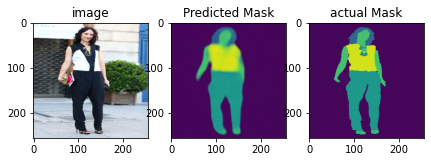

In [42]:
n = random.randint(0,100)
n = 18
Plotter(actuals[n], maskPred[n], masks[n])

In [201]:
#show img on cv2
def cv2imshow(img):
    cv2.imshow('image window', img)
    # add wait key. window waits until user presses a key
    cv2.waitKey(0)
    # and finally destroy/close all open windows
    cv2.destroyAllWindows()

In [225]:
#convert bgr img to rgb on cv2
im_rgb = cv2.cvtColor(maskPred[n], cv2.COLOR_BGR2RGB)

#show img on cv2
cv2imshow(im_rgb)

In [228]:
cv2.imwrite('testResult/image.png', im_rgb * 255)

True

In [204]:
colorSample = (165-50,218-50,53-50)
colorSample2 = (165+50,218+50,53+50)

none = (69, 6, 90)

In [205]:
im = cv2.imread('testResult/image.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

im_hvs = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

In [229]:
from matplotlib.colors import hsv_to_rgb

displaySample = np.full((10, 10, 3), colorSample, dtype=np.uint8) / 255

#plt.imshow((displaySample))

In [219]:
im = cv2.imread('testResult/image.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

#Get the Body Object
def getBodyOutline(actual, mask, backColor):
    masking = cv2.inRange(im, backColor, backColor)
    masking = cv2.bitwise_not(masking)
    result = cv2.bitwise_and(im, im, mask=masking)
    
    return result

#Get Clothes Object
def getClothes(actual, mask, minColor, maxColor):
    masking = cv2.inRange(im, minColor, maxColor)
    result = cv2.bitwise_and(im_actual, im_actual, mask=masking)
    
    return result

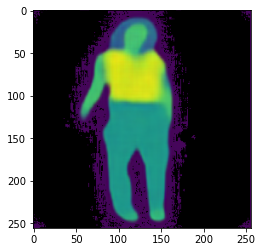

In [218]:
bodySample = getBodyOutline(im_actual, im, none)

plt.imshow(bodySample)

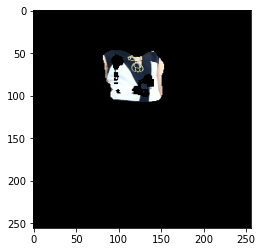

In [224]:
clothSample = getClothes(im_actual, im, colorSample, colorSample2)

plt.imshow(clothSample)